In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [309]:
pd.set_option('display.max_columns', None)
sns.reset_defaults()

In [310]:
df = pd.read_csv('data/Sleep.csv')

In [311]:
#Data is allready clean, I used SQL to proccess it.
#Data test: Tquality is correct if the sum of these three columns is 100; otherwise, the row is corrupt

df['Check'] = df['REM sleep percentage'] + df['Deep sleep percentage'] + df['Light sleep percentage']
df['Check'].value_counts()

100    452
Name: Check, dtype: int64

In [312]:
#All the data is correct
df = df.drop('Check', axis=1)

In [313]:
#Check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing:.1%}')

Age - 0.0%
Gender - 0.0%
Sleep duration - 0.0%
Sleep efficiency - 0.0%
REM sleep percentage - 0.0%
Deep sleep percentage - 0.0%
Light sleep percentage - 0.0%
Awakenings - 0.0%
Caffeine consumption - 0.0%
Alcohol consumption - 0.0%
Smoking status - 0.0%
Exercise frequency - 0.0%
BedtimeHours - 0.0%
WakeuptimeHours - 0.0%
day - 0.0%
RealSleep - 0.0%
SleepRem - 0.0%
SleepDeep - 0.0%
SleepLight - 0.0%
RealNoSleep - 0.0%


In [314]:
#Rename columns
df = df.rename(columns={'Age': 'age',
                        'Gender': 'gender',
                        'Sleep duration': 'sleep_duration',
                        'Sleep efficiency': 'sleep_efficiency',
                        'REM sleep percentage': 'rem_percentage',
                        'Deep sleep percentage': 'deep_percentage',
                        'Light sleep percentage': 'light_percentage',
                        'Awakenings': 'awakenings',
                        'Caffeine consumption': 'caffeine',
                        'Alcohol consumption': 'alcohol',
                        'Smoking status': 'smoking',
                        'Exercise frequency': 'exercise',
                        'BedtimeHours': 'bedtime',
                        'WakeuptimeHours': 'wakeuptime',
                        'RealSleep': 'sleep_time',
                        'SleepRem': 'rem_time',
                        'SleepDeep': 'deep_time',
                        'SleepLight': 'light_time',
                        'RealNoSleep': 'nosleep_time'})

In [315]:
#Creating groups of the age for more clarity
df['grouped_age'] = pd.cut(df['age'], bins=range(0, 81, 20), right=False)
df['grouped_age']

0      [60, 80)
1      [60, 80)
2      [40, 60)
3      [40, 60)
4      [40, 60)
         ...   
447    [20, 40)
448    [40, 60)
449    [40, 60)
450    [40, 60)
451     [0, 20)
Name: grouped_age, Length: 452, dtype: category
Categories (4, interval[int64, left]): [[0, 20) < [20, 40) < [40, 60) < [60, 80)]

In [316]:
df['caffeine'].value_counts()

0      211
50     107
25      79
24      25
75      25
200      4
100      1
Name: caffeine, dtype: int64

In [317]:
#Improving caffeine data readavility 
df['caffeine'] = df['caffeine'].replace({24: 25})
df['caffeine'] = df['caffeine'].apply(lambda x: '>100' if x >= 100 else x)
df['caffeine'].value_counts()


0       211
50      107
25      104
75       25
>100      5
Name: caffeine, dtype: int64

In [318]:
day_dict = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['day_order'] = df['day'].map(day_dict)
df[['day', 'day_order']]

,day,day_order
0,Saturday,6
1,Sunday,7
2,Tuesday,2
3,Wednesday,3
4,Saturday,6
...,...,...
447,Saturday,6
448,Wednesday,3
449,Tuesday,2
450,Thursday,4


In [319]:
df[['day', 'day_order']]

,day,day_order
0,Saturday,6
1,Sunday,7
2,Tuesday,2
3,Wednesday,3
4,Saturday,6
...,...,...
447,Saturday,6
448,Wednesday,3
449,Tuesday,2
450,Thursday,4


In [320]:
df.dtypes

age                    int64
gender                object
sleep_duration       float64
sleep_efficiency     float64
rem_percentage         int64
deep_percentage        int64
light_percentage       int64
awakenings             int64
caffeine              object
alcohol                int64
smoking               object
exercise               int64
bedtime               object
wakeuptime            object
day                   object
sleep_time           float64
rem_time             float64
deep_time            float64
light_time           float64
nosleep_time         float64
grouped_age         category
day_order              int64
dtype: object

In [321]:
#Data fixed
df.head()

,age,gender,sleep_duration,sleep_efficiency,rem_percentage,deep_percentage,light_percentage,awakenings,caffeine,alcohol,smoking,exercise,bedtime,wakeuptime,day,sleep_time,rem_time,deep_time,light_time,nosleep_time,grouped_age,day_order
0,65,Female,6.0,0.88,18,70,12,0,0,0,Yes,3,01:00:00,07:00:00,Saturday,5.28,1.08,4.20,0.72,0.72,"[60, 80)",6
1,69,Male,7.0,0.66,19,28,53,3,0,3,Yes,3,02:00:00,09:00:00,Sunday,4.62,1.33,1.96,3.71,2.38,"[60, 80)",7
2,40,Female,8.0,0.89,20,70,10,1,0,0,No,3,21:30:00,05:30:00,Tuesday,7.12,1.60,5.60,0.80,0.88,"[40, 60)",2
3,40,Female,6.0,0.51,23,25,52,3,50,5,Yes,1,02:30:00,08:30:00,Wednesday,3.06,1.38,1.50,3.12,2.94,"[40, 60)",3
4,57,Male,8.0,0.76,27,55,18,3,0,3,No,3,01:00:00,09:00:00,Saturday,6.08,2.16,4.40,1.44,1.92,"[40, 60)",6


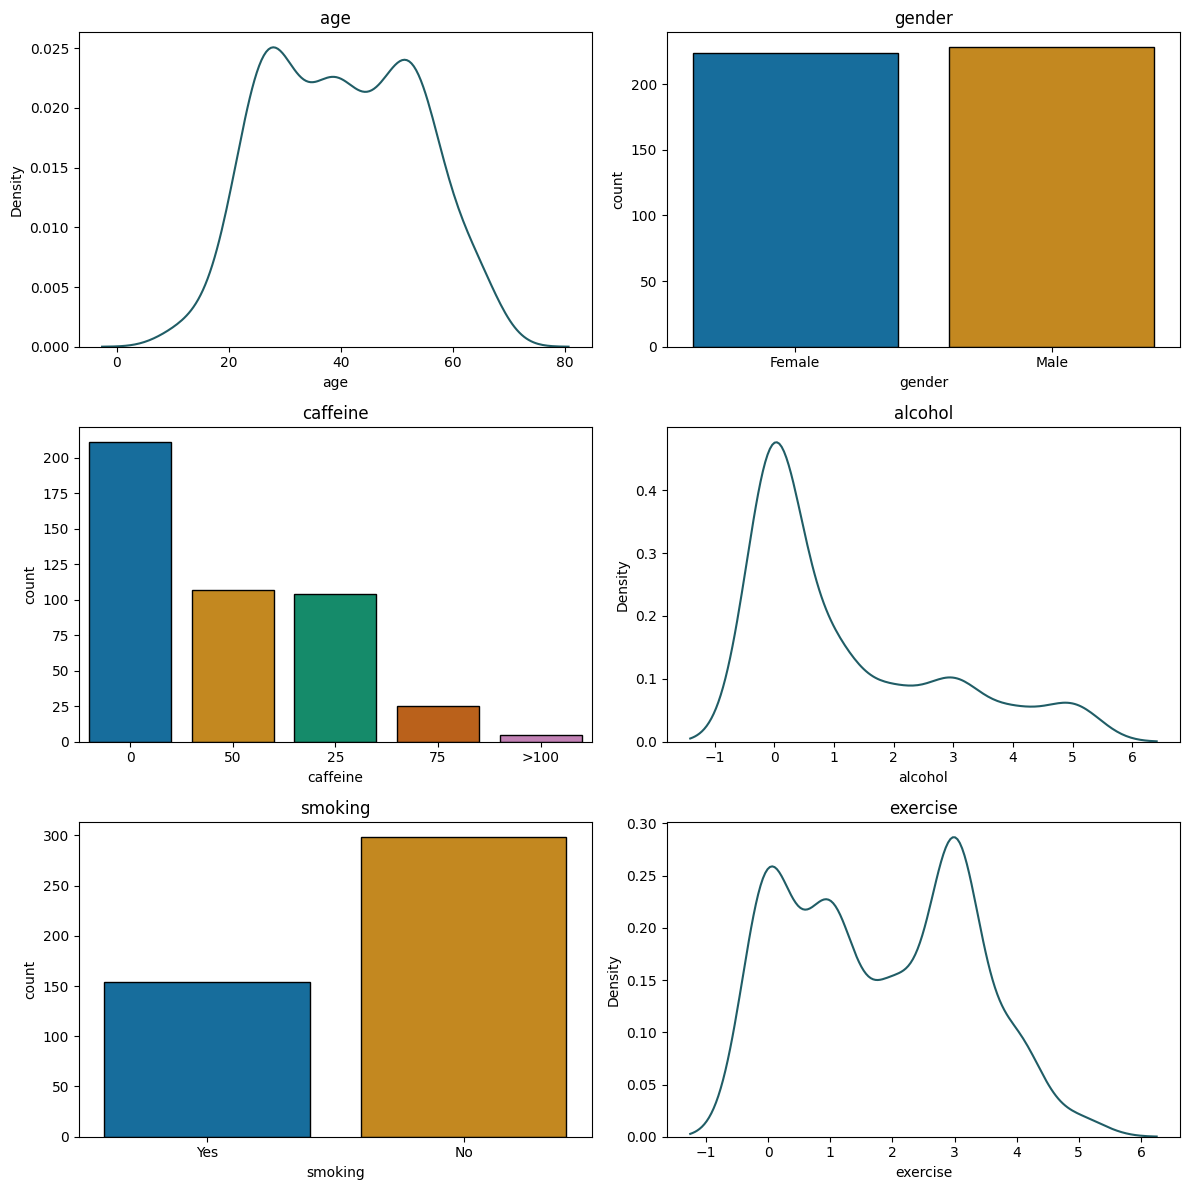

In [322]:

#Plot data related to the population
df_pop = df[['age', 'gender', 'caffeine', 'alcohol', 'smoking', 'exercise']]

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i, column in enumerate(df_pop.columns):
    if df_pop[column].dtype == 'object':  
        sns.countplot(data=df_pop, x=column, ax=axs[i], palette='colorblind', edgecolor='black')
    else: 
        sns.kdeplot(data=df_pop, x=column, ax=axs[i], color='#205D66')
    axs[i].set_title(column)

plt.tight_layout()
plt.show()


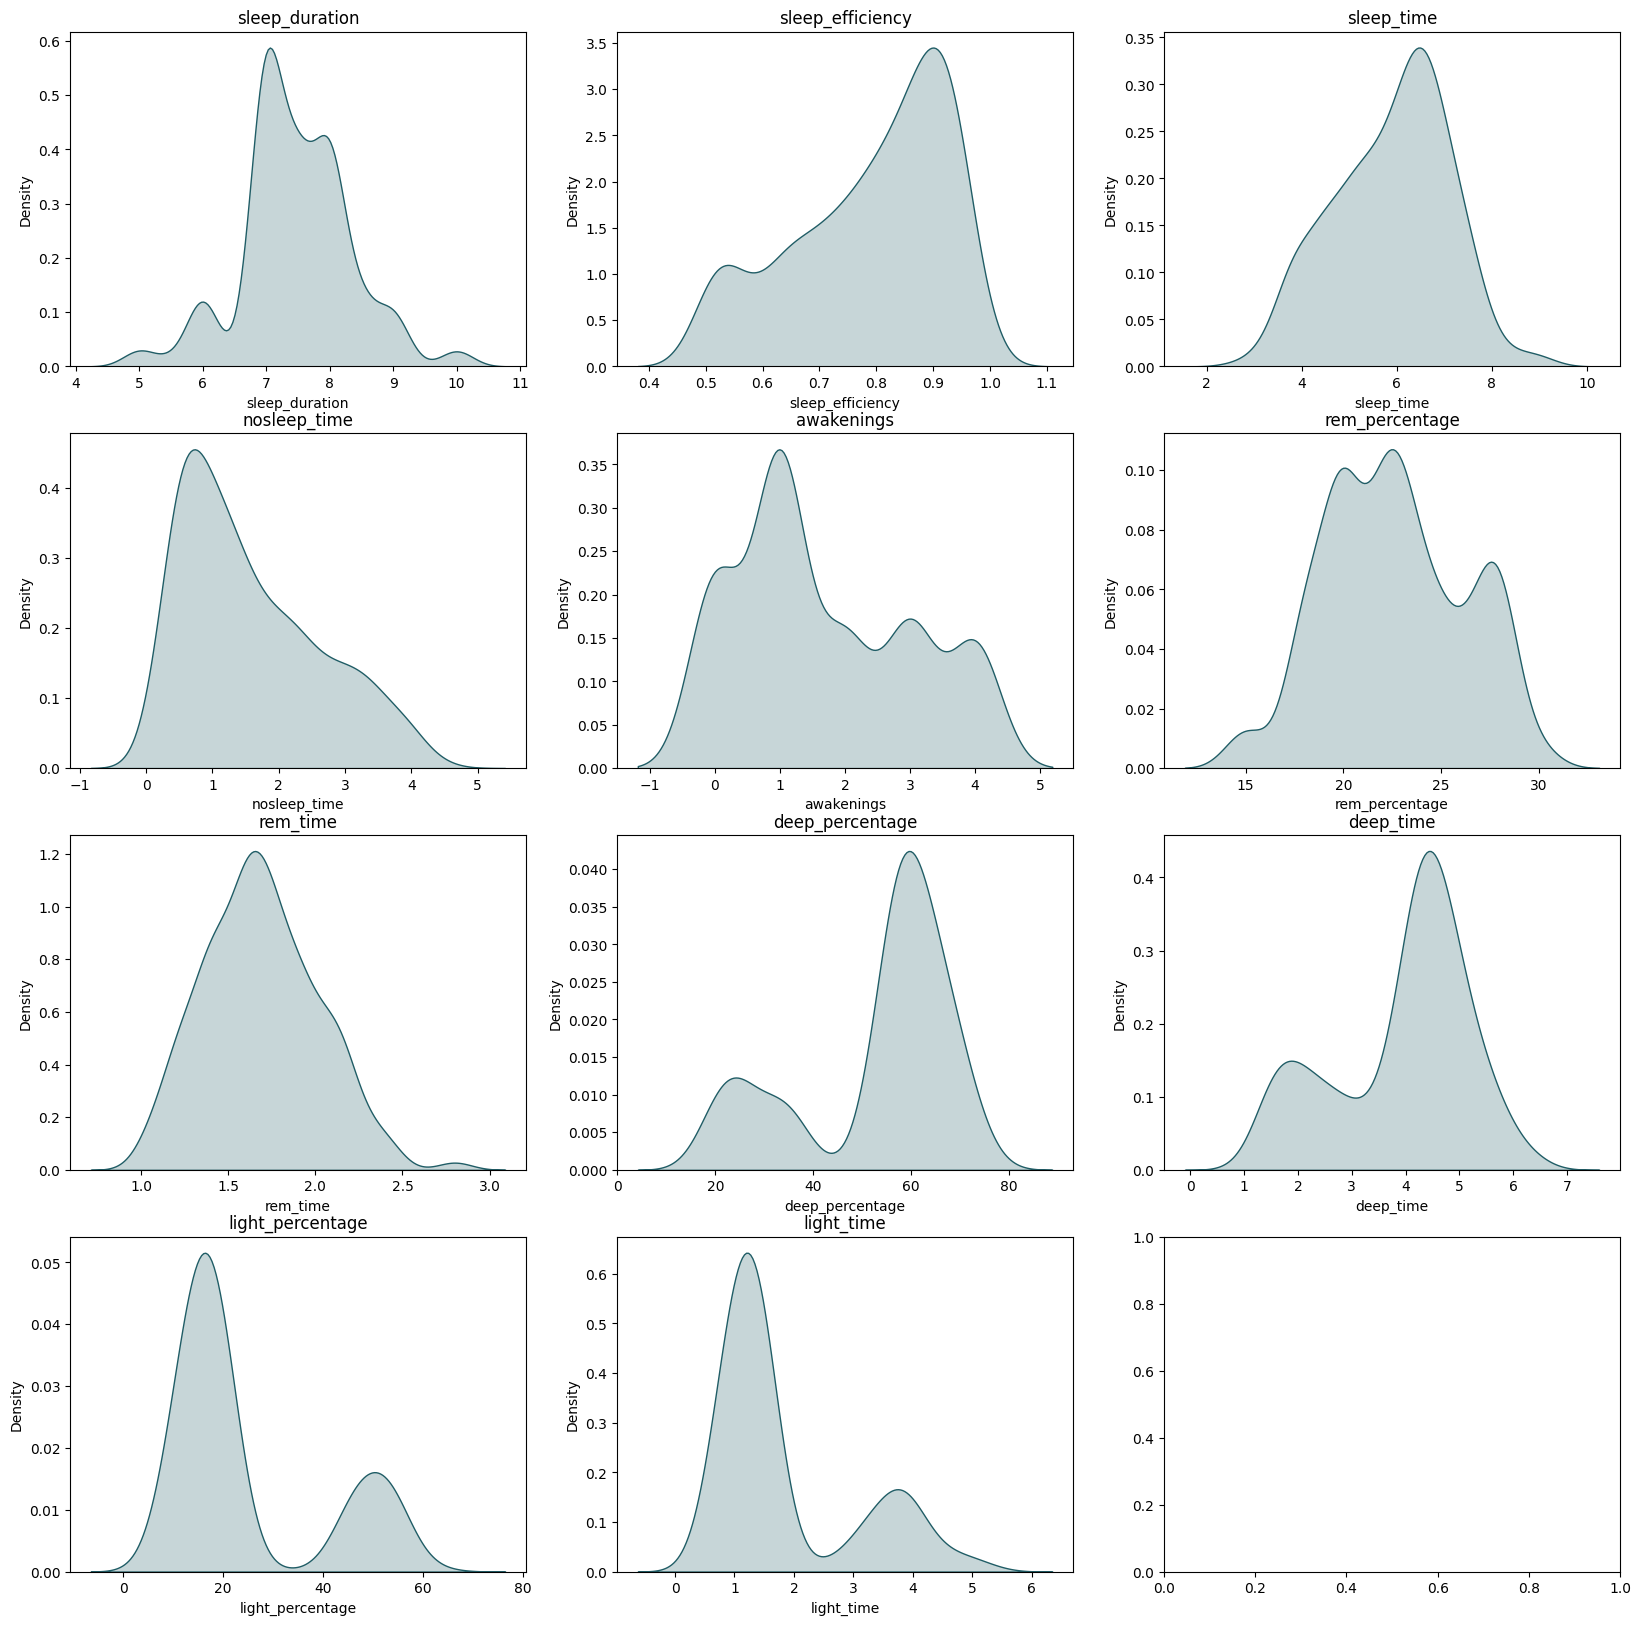

In [323]:
df_sleep = df[['sleep_duration', 'sleep_efficiency', 'sleep_time', 'nosleep_time', 'awakenings', 'rem_percentage', 'rem_time', 'deep_percentage', 'deep_time', 'light_percentage', 'light_time']]

fig, axs = plt.subplots(4, 3, figsize=(20, 20))
axs = axs.flatten()

for i, column in enumerate(df_sleep.columns):
    if df_sleep[column].dtype != 'object':
        sns.kdeplot(data=df_sleep, x=column, fill=True, ax=axs[i], color='#205D66')
        axs[i].set_title(column)
plt.show()

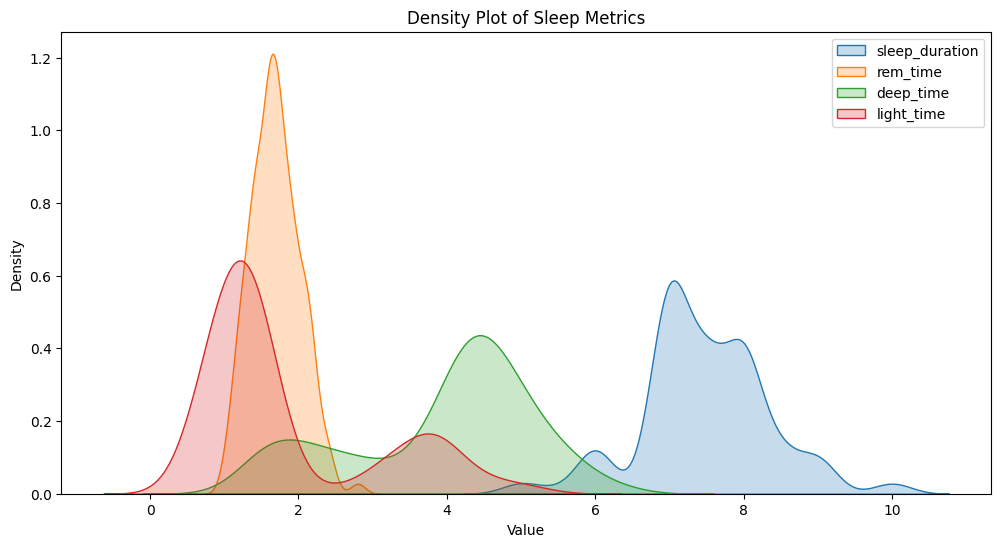

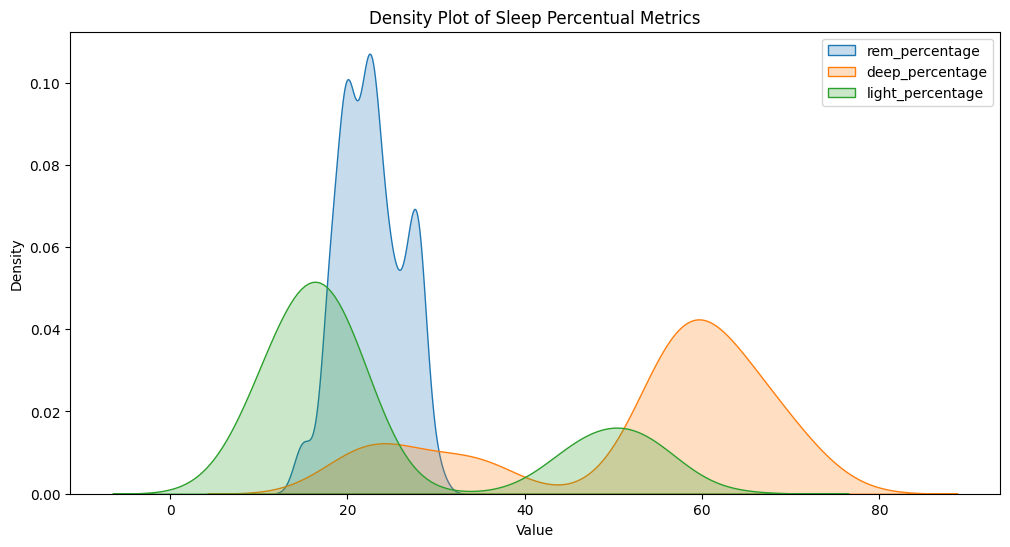

In [324]:
#Create density plot of sleep metrics
variables = ['sleep_duration', 'rem_time', 'deep_time', 'light_time']


fig, ax = plt.subplots(figsize=(12,6))

for i in range(len(variables)):
    sns.kdeplot(data=df, x=variables[i], fill=True, ax=ax, label=variables[i])

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Sleep Metrics')
ax.legend()

plt.show()


#Create density plot of sleep percentual metrics
variables_percentage = ['rem_percentage', 'deep_percentage', 'light_percentage']


fig, ax = plt.subplots(figsize=(12,6))

for i in range(len(variables_percentage)):
    sns.kdeplot(data=df, x=variables_percentage[i], fill=True, ax=ax, label=variables_percentage[i])

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Sleep Percentual Metrics')
ax.legend()

plt.show()


Podemos observar como la distribución del sueño REM no se desarrolla de la misma manera en la parte proporcional. Esto ocurre porque la cantidad de tiempo REM apenas se ve afectada por el tiempo del sueño u otros factores, tendiendo a ser siempre el mismo valor.

Comprobaciones:

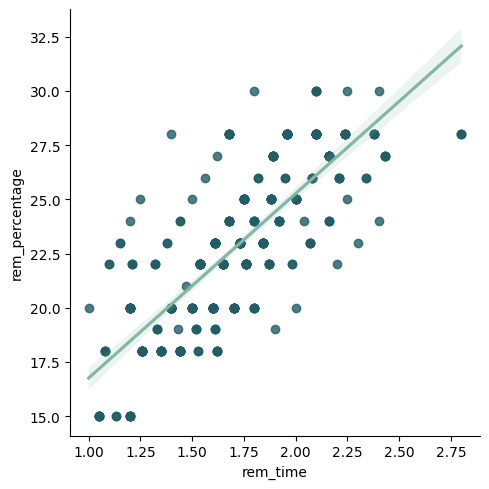

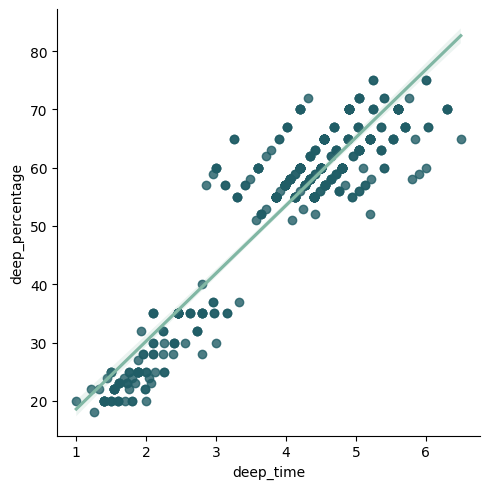

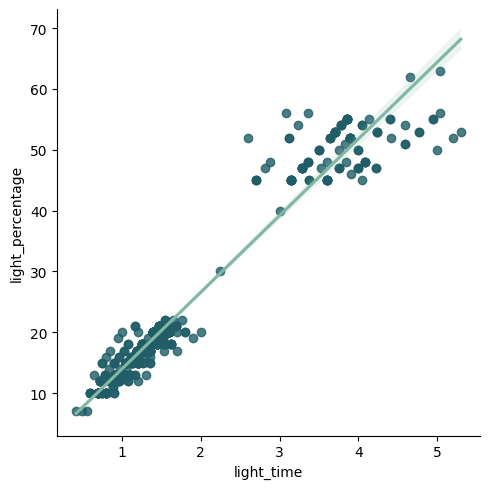

In [325]:
sns.lmplot(x='rem_time', y='rem_percentage', data=df, 
           line_kws={'color': '#81B7A4'}, scatter_kws={'color': '#205D66'});
sns.lmplot(x='deep_time', y='deep_percentage', data=df, 
           line_kws={'color': '#81B7A4'}, scatter_kws={'color': '#205D66'});
sns.lmplot(x='light_time', y='light_percentage', data=df, 
           line_kws={'color': '#81B7A4'}, scatter_kws={'color': '#205D66'});

plt.show()

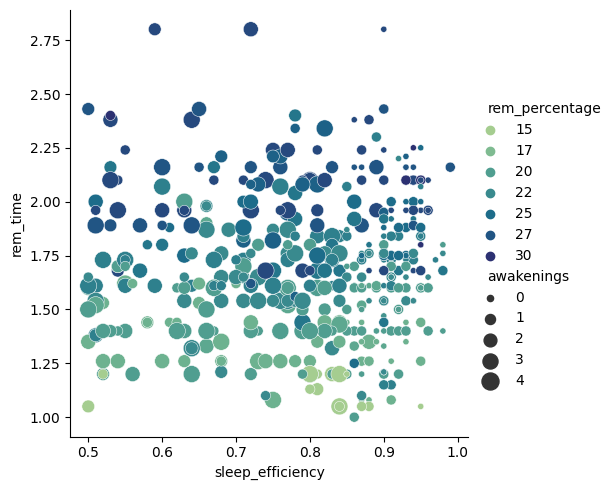

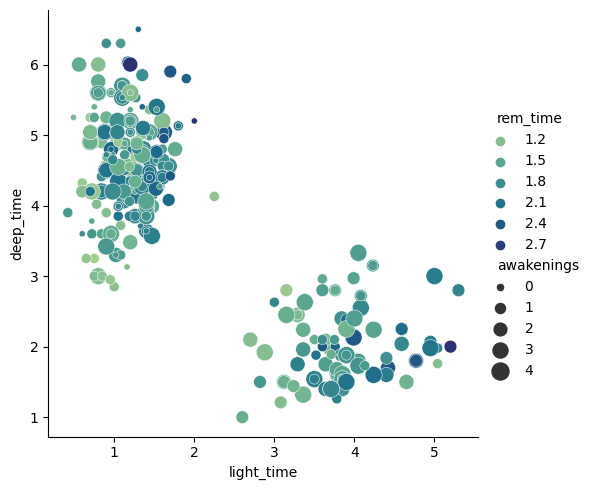

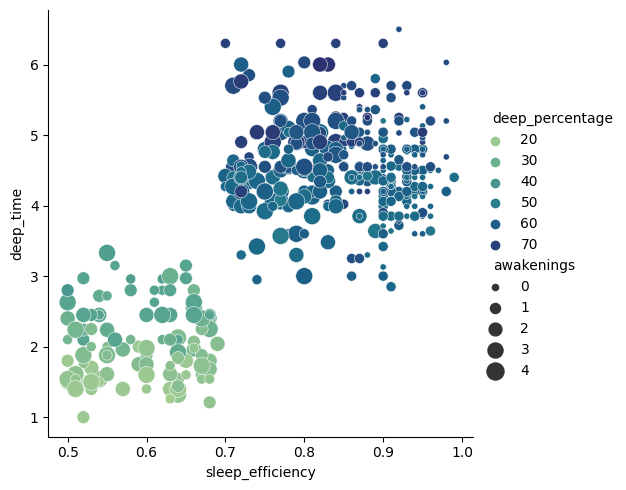

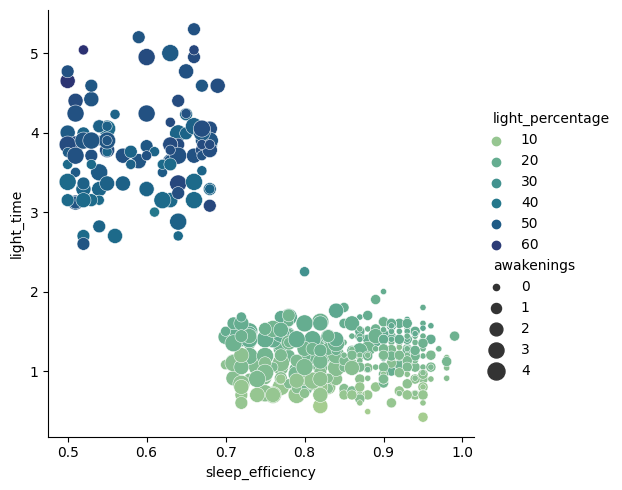

In [326]:
sns.relplot(
    data=df, x='sleep_efficiency', y='rem_time',
#    col='time',
    hue='rem_percentage', palette='crest',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

sns.relplot(
    data=df, x='light_time', y='deep_time',
#    col='time',
    hue='rem_time', palette='crest',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time',
#    col='time',
    hue='deep_percentage', palette='crest',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

sns.relplot(
    data=df, x='sleep_efficiency', y='light_time',
#    col='time',
    hue='light_percentage', palette='crest',
    size='awakenings', sizes=(20, 150),
#    style='rem_percentage',
    kind='scatter',
#    legend='full'
)
plt.show()

Podemos ver como mientras que el porcentage varia más, la cantida de tiempo en sueño REM se mantiene bastante estable en el mismo valor, independientemente de la eficiancia del sueño, es decir, mientras otros tipos de sueño se ven afectados al tener un peor descanso, la cantidad de sueño REM apenas se ve afectado. 

En cambio el sueño deep y el light se ven muy afectados por la calidad del sueño y sus interrupciones, siendo estos inversamente proporcionales.

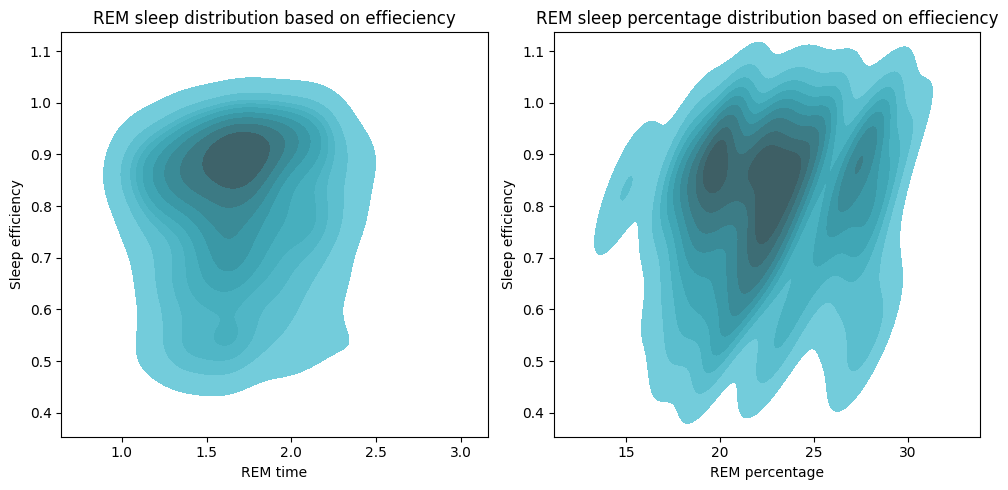

In [327]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.kdeplot(data=df, x="rem_time", y="sleep_efficiency", fill=True, ax=axes[0], color='#205D66')
axes[0].set_xlabel("REM time")
axes[0].set_ylabel("Sleep efficiency")
axes[0].set_title("REM sleep distribution based on effieciency")

sns.kdeplot(data=df, x="rem_percentage", y="sleep_efficiency", fill=True, ax=axes[1], color='#205D66')
axes[1].set_xlabel("REM percentage")
axes[1].set_ylabel("Sleep efficiency")
axes[1].set_title("REM sleep percentage distribution based on effieciency")

plt.tight_layout()
plt.show()

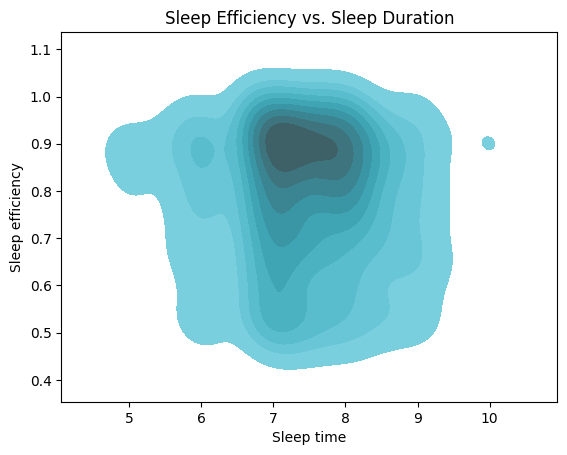

In [328]:
sns.kdeplot(data=df, x="sleep_duration", y="sleep_efficiency", fill=True, color='#205D66').set(xlabel="Sleep time", ylabel="Sleep efficiency")
plt.title("Sleep Efficiency vs. Sleep Duration")
plt.show()

La duración más optima del sueño es de 7 a 8 horas, es la franja más eficiente.

In [329]:
#Numerize Columns for correlation
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,age,gender,sleep_duration,sleep_efficiency,rem_percentage,deep_percentage,light_percentage,awakenings,caffeine,alcohol,smoking,exercise,bedtime,wakeuptime,day,sleep_time,rem_time,deep_time,light_time,nosleep_time,grouped_age,day_order
0,65,0,6.0,0.88,18,70,12,0,0,0,1,3,2,8,2,5.28,1.08,4.20,0.72,0.72,"[60, 80)",6
1,69,1,7.0,0.66,19,28,53,3,0,3,1,3,4,12,3,4.62,1.33,1.96,3.71,2.38,"[60, 80)",7
2,40,0,8.0,0.89,20,70,10,1,0,0,0,3,7,5,5,7.12,1.60,5.60,0.80,0.88,"[40, 60)",2
3,40,0,6.0,0.51,23,25,52,3,2,5,1,1,5,11,6,3.06,1.38,1.50,3.12,2.94,"[40, 60)",3
4,57,1,8.0,0.76,27,55,18,3,0,3,0,3,2,12,2,6.08,2.16,4.40,1.44,1.92,"[40, 60)",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,7.5,0.91,22,57,21,0,0,0,0,5,8,5,2,6.83,1.65,4.27,1.57,0.67,"[20, 40)",6
448,52,1,6.0,0.74,28,57,15,4,1,0,0,3,6,0,6,4.44,1.68,3.42,0.90,1.56,"[40, 60)",3
449,40,0,8.5,0.55,20,32,48,1,1,3,1,0,10,9,5,4.68,1.70,2.72,4.08,3.82,"[40, 60)",2
450,45,1,7.0,0.76,18,72,10,3,0,0,0,3,6,2,4,5.32,1.26,5.04,0.70,1.68,"[40, 60)",4


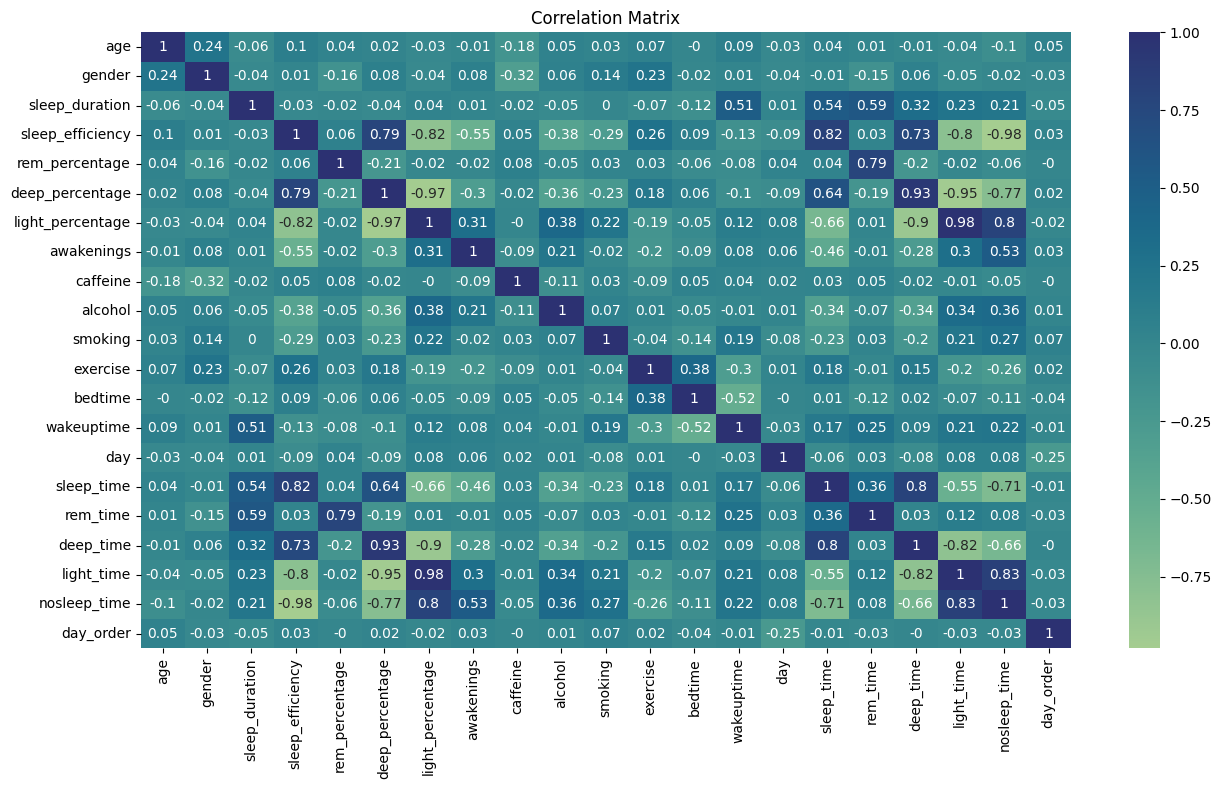

In [330]:
#Correlation matrix
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True).round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')

plt.title('Correlation Matrix')
plt.show()

In [331]:
#Clasify correlations pairs for visibility purposes
df_general_corr = df_numerized.copy()
df_general_corr = df_general_corr.drop(['sleep_time', 'rem_time', 'deep_time', 'light_time', 'nosleep_time', 'grouped_age', 'day'], axis=1)

correlation_mat = df_general_corr.corr()
sorted_corr_pairs = correlation_mat.unstack().sort_values()


high_corr = sorted_corr_pairs[np.logical_or(np.logical_and(sorted_corr_pairs > 0.5, sorted_corr_pairs < 1), np.logical_and(sorted_corr_pairs < -0.5, sorted_corr_pairs > -1))]
mid_corr = sorted_corr_pairs[np.logical_or(np.logical_and(sorted_corr_pairs >= 0.25, sorted_corr_pairs < 0.5),  np.logical_and(sorted_corr_pairs <= -0.25, sorted_corr_pairs > -0.5))]

#Print only pairs to avoid repetition
print(f'High correlation values:\n{high_corr.iloc[::2]}\n')
print(f'Mid correlation values:\n{mid_corr.iloc[::2]}\n')

High correlation values:
deep_percentage   light_percentage   -0.974311
sleep_efficiency  light_percentage   -0.819204
                  awakenings         -0.550426
wakeuptime        bedtime            -0.518539
                  sleep_duration      0.508143
deep_percentage   sleep_efficiency    0.787335
dtype: float64

Mid correlation values:
sleep_efficiency  alcohol           -0.383701
alcohol           deep_percentage   -0.356217
gender            caffeine          -0.317376
exercise          wakeuptime        -0.302726
deep_percentage   awakenings        -0.301815
sleep_efficiency  smoking           -0.290026
                  exercise           0.257688
light_percentage  awakenings         0.312275
                  alcohol            0.375908
bedtime           exercise           0.378433
dtype: float64



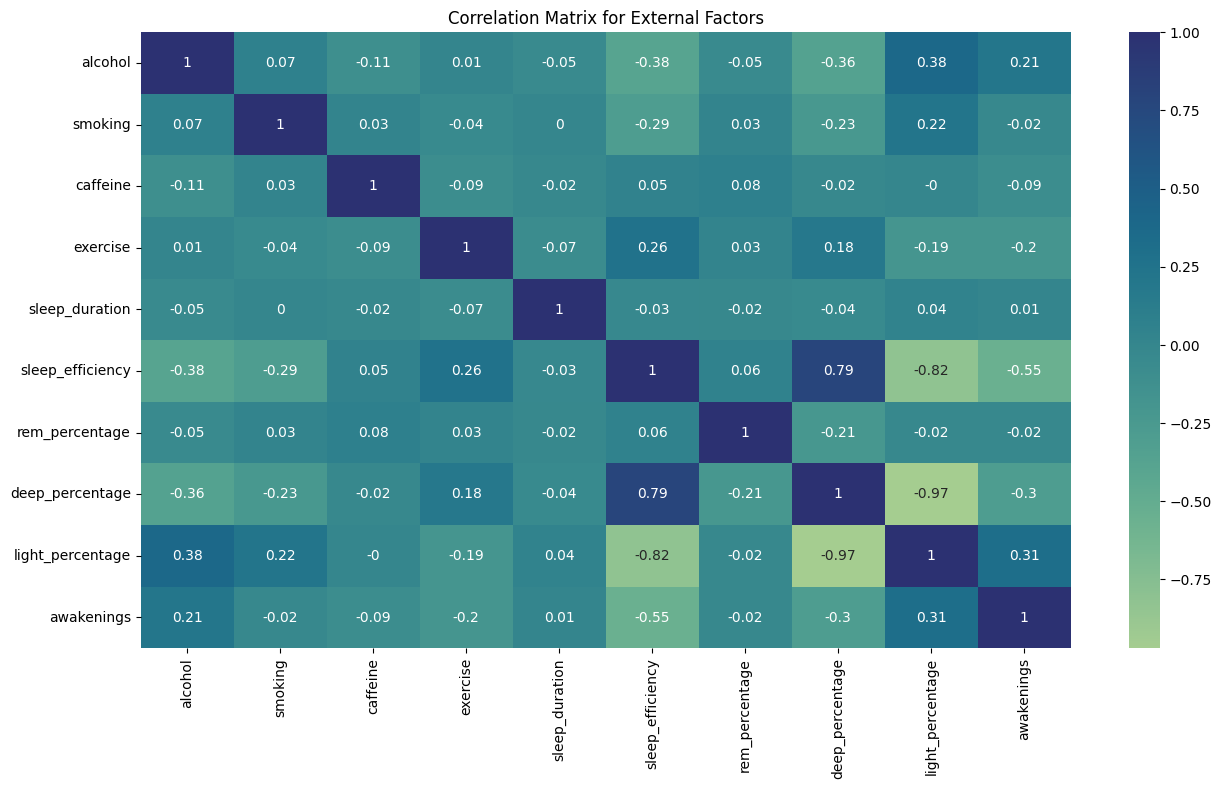

In [332]:
df_external = df_numerized[['alcohol', 'smoking', 'caffeine', 'exercise', 'sleep_duration', 'sleep_efficiency', 'rem_percentage', 'deep_percentage', 'light_percentage', 'awakenings']]

#Correlation matrix
correlation_matrix = df_external.corr(method='pearson', numeric_only=True).round(2)


plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')


plt.title('Correlation Matrix for External Factors')
plt.show()

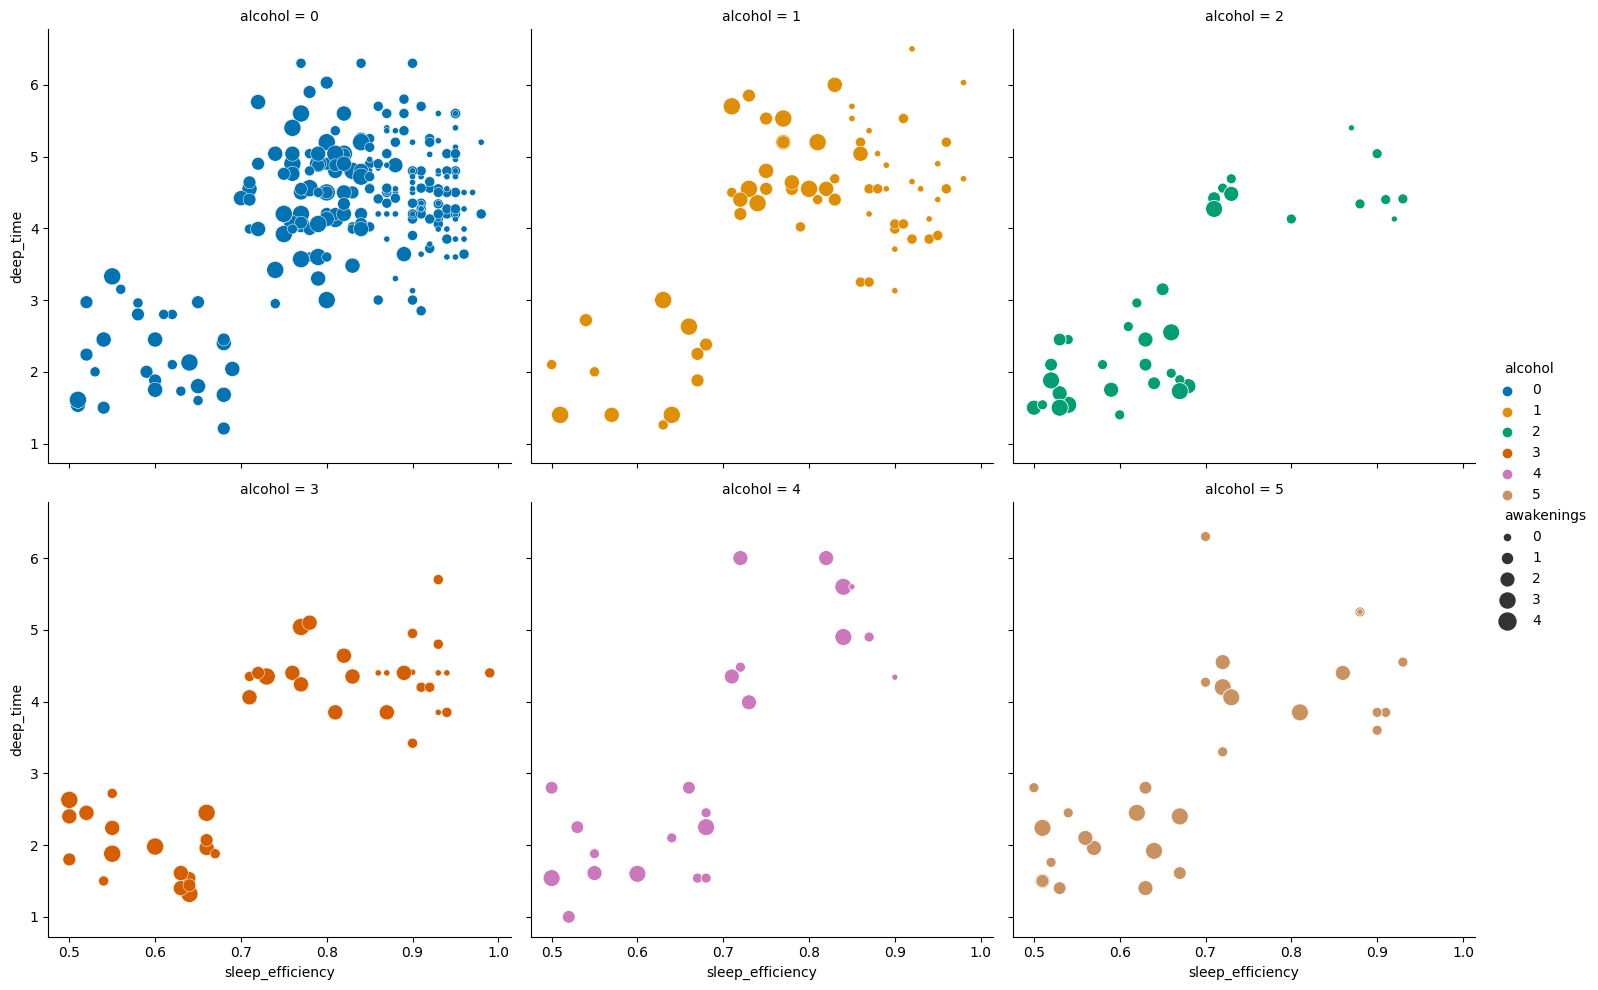

In [333]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time', palette='colorblind',
    col='alcohol',
    hue='alcohol',
    size='awakenings', sizes=(20, 150),
    kind='scatter',
    col_wrap=3,
)
plt.show()

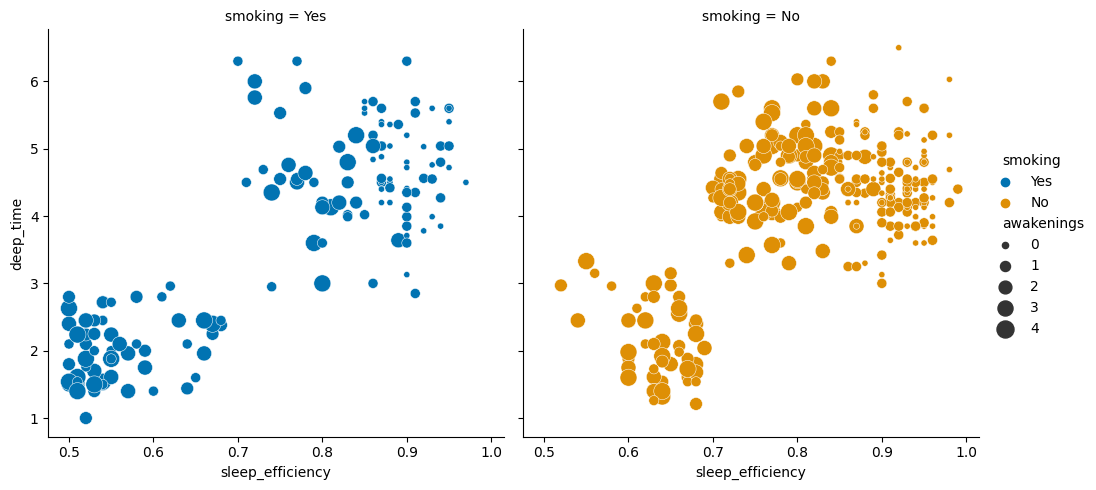

In [334]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time', palette='colorblind',
    col='smoking',
    hue='smoking',
    size='awakenings', sizes=(20, 150),
    kind='scatter',
    col_wrap=2,
)
plt.show()

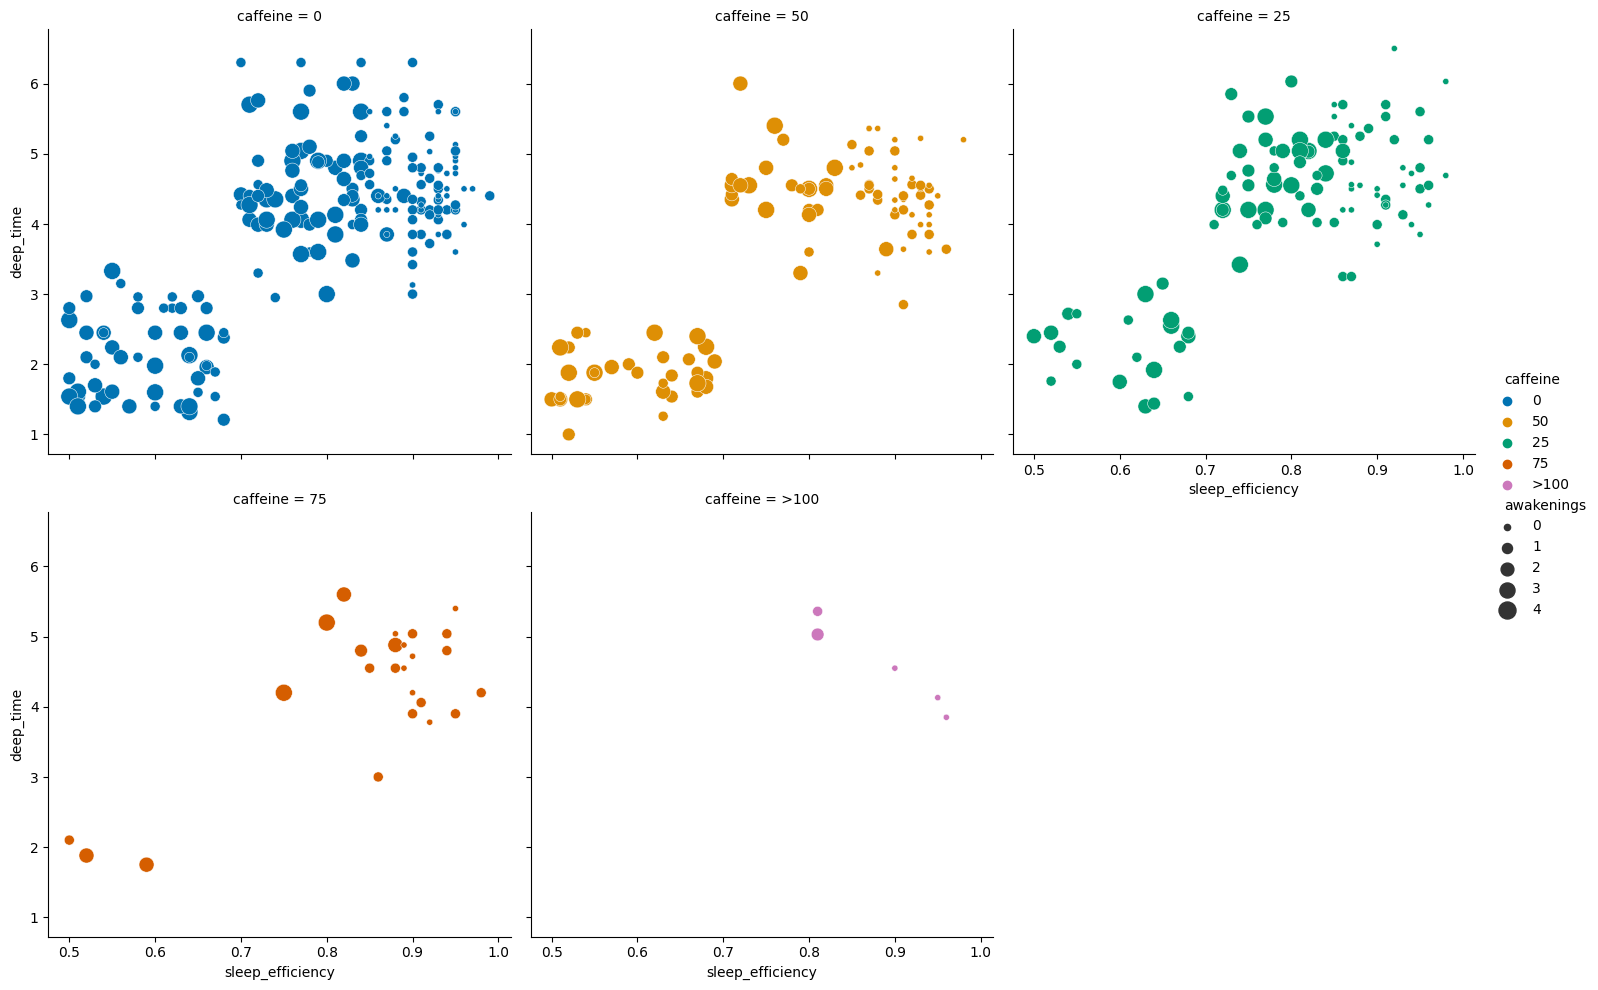

In [335]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time', palette='colorblind',
    col='caffeine',
    hue='caffeine',
    size='awakenings', sizes=(20, 150),
    kind='scatter',
    col_wrap=3,
)
plt.show()

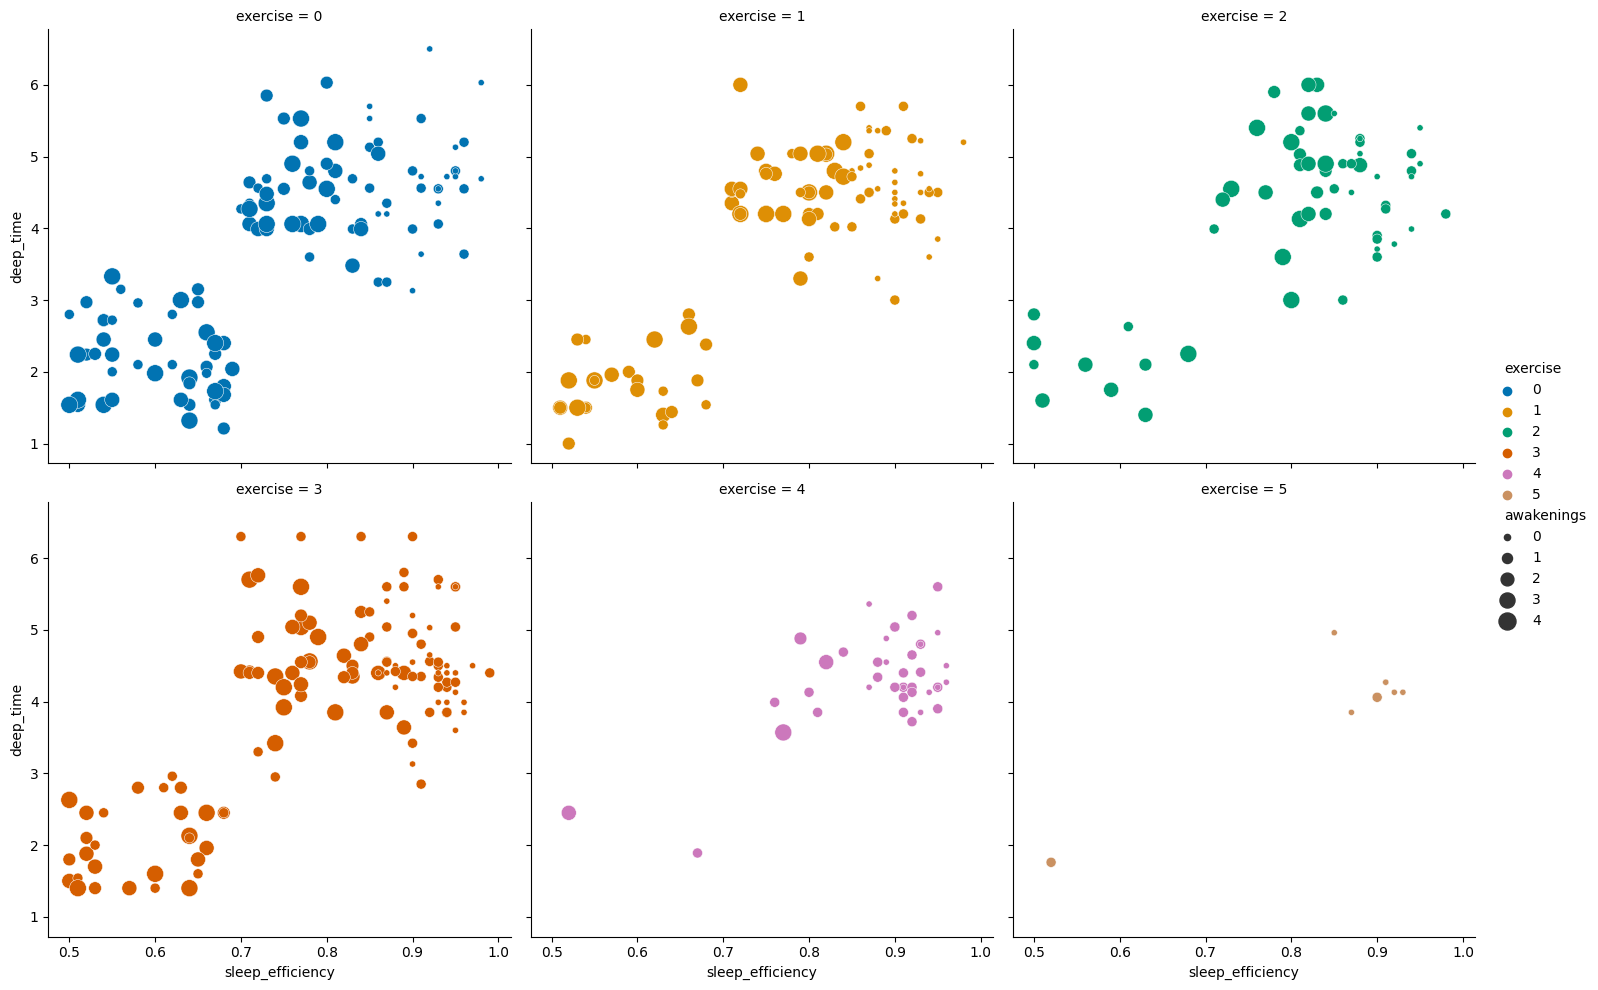

In [336]:
sns.relplot(
    data=df, x='sleep_efficiency', y='deep_time', palette='colorblind',
    col='exercise',
    hue='exercise',
    size='awakenings', sizes=(20, 150),
    kind='scatter',
    col_wrap=3,
)
plt.show()

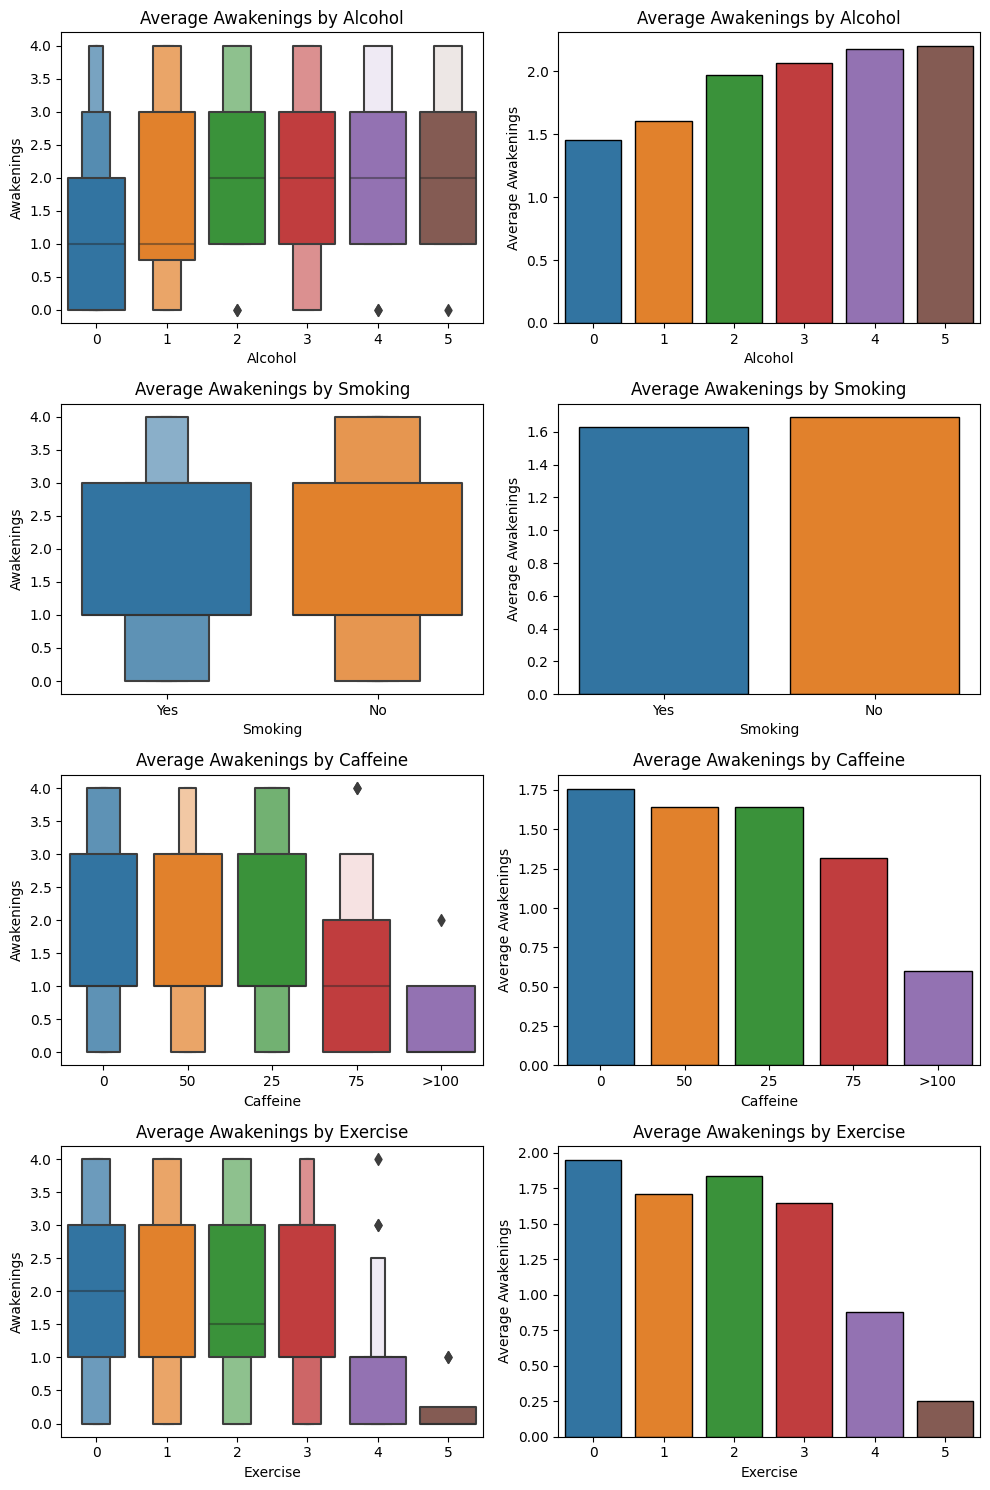

In [337]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

sns.boxenplot(data=df, x="alcohol", y="awakenings", k_depth="trustworthy", ax=axes[0,0])
axes[0,0].set_xlabel('Alcohol')
axes[0,0].set_ylabel('Awakenings')
axes[0,0].set_title('Average Awakenings by Alcohol')

sns.barplot(data=df, x='alcohol', y='awakenings', errorbar=None, ax=axes[0,1], edgecolor='black')
axes[0,1].set_xlabel('Alcohol')
axes[0,1].set_ylabel('Average Awakenings')
axes[0,1].set_title('Average Awakenings by Alcohol')

sns.boxenplot(data=df, x="smoking", y="awakenings", k_depth="trustworthy", ax=axes[1,0])
axes[1,0].set_xlabel('Smoking')
axes[1,0].set_ylabel('Awakenings')
axes[1,0].set_title('Average Awakenings by Smoking')

sns.barplot(data=df, x='smoking', y='awakenings', errorbar=None, ax=axes[1,1], edgecolor='black')
axes[1,1].set_xlabel('Smoking')
axes[1,1].set_ylabel('Average Awakenings')
axes[1,1].set_title('Average Awakenings by Smoking')

sns.boxenplot(data=df, x="caffeine", y="awakenings", k_depth="trustworthy", ax=axes[2,0])
axes[2,0].set_xlabel('Caffeine')
axes[2,0].set_ylabel('Awakenings')
axes[2,0].set_title('Average Awakenings by Caffeine')

sns.barplot(data=df, x='caffeine', y='awakenings', errorbar=None, ax=axes[2,1], edgecolor='black')
axes[2,1].set_xlabel('Caffeine')
axes[2,1].set_ylabel('Average Awakenings')
axes[2,1].set_title('Average Awakenings by Caffeine')

sns.boxenplot(data=df, x="exercise", y="awakenings", k_depth="trustworthy", ax=axes[3,0])
axes[3,0].set_xlabel('Exercise')
axes[3,0].set_ylabel('Awakenings')
axes[3,0].set_title('Average Awakenings by Exercise')

sns.barplot(data=df, x='exercise', y='awakenings', errorbar=None, ax=axes[3,1], edgecolor='black')
axes[3,1].set_xlabel('Exercise')
axes[3,1].set_ylabel('Average Awakenings')
axes[3,1].set_title('Average Awakenings by Exercise')

plt.tight_layout()
plt.show()

Analizamos como influyen los factores externos en el sueño, no sin antes recordar que el sueño REM prácticamente no se ve afectado por ellos, pero si el sueño profundo y ligero, que estan directamente relacionados, al igual que la cantidad de interrupciones del sueño.

Así es como influyen en la calidad de sueño los siguientes factores externos:

Alcohol:
 - Es el que más afecta a la calidad de sueño.
 - Reduce considerablemente el sueño profundo, en beneficio del sueño ligero.
 - Aumenta la cantidad de interrupciones del sueño.

Tabaco:
 - Aumenta las interrupciones del sueño en la misma medida que el alcohol.
 - Reduce el sueño profundo, en menor medida que el alcohol.


Cafeína:
 - Contraintuitivamente mejora el sueño, aunque esto puede deberse a que la muestra de consumidores de café es muy 

Ejercicio:
 - Tiene un efecto muy positivo con la mejora del sueño.
 - Reduce los despertares y aumenta el sueño profundo.
 - La diferencia se hace realmente notable en la gente que practica mucho deporte.
 - Aún así, en general, su impacto no es tan significativo como el del alcohol.


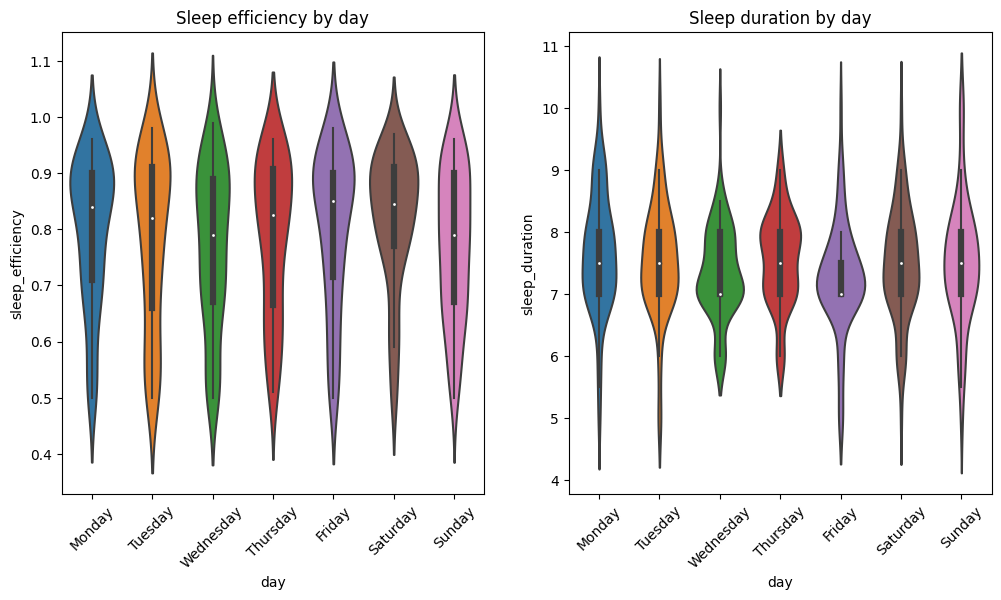

Duración media del sueño el día Monday: 7.65
Eficiencia media del sueño el día Monday: 0.79

Duración media del sueño el día Tuesday: 7.54
Eficiencia media del sueño el día Tuesday: 0.78

Duración media del sueño el día Wednesday: 7.34
Eficiencia media del sueño el día Wednesday: 0.77

Duración media del sueño el día Thursday: 7.56
Eficiencia media del sueño el día Thursday: 0.79

Duración media del sueño el día Friday: 7.25
Eficiencia media del sueño el día Friday: 0.8

Duración media del sueño el día Saturday: 7.48
Eficiencia media del sueño el día Saturday: 0.82

Duración media del sueño el día Sunday: 7.51
Eficiencia media del sueño el día Sunday: 0.77



In [338]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.violinplot(data=df, x='day', y='sleep_efficiency', order=days, ax=ax1)
ax1.set_title('Sleep efficiency by day')
ax1.tick_params(axis='x', rotation=45)

sns.violinplot(data=df, x='day', y='sleep_duration', order=days, ax=ax2)
ax2.set_title('Sleep duration by day')
ax2.tick_params(axis='x', rotation=45)

plt.show()

for day in days:
    day_data = df[df['day'] == day]
    dur_day = day_data['sleep_duration'].mean()
    ef_day = day_data['sleep_efficiency'].mean()
    print(f'Duración media del sueño el día {day}: {dur_day.round(2)}')
    print(f'Eficiencia media del sueño el día {day}: {ef_day.round(2)}\n')


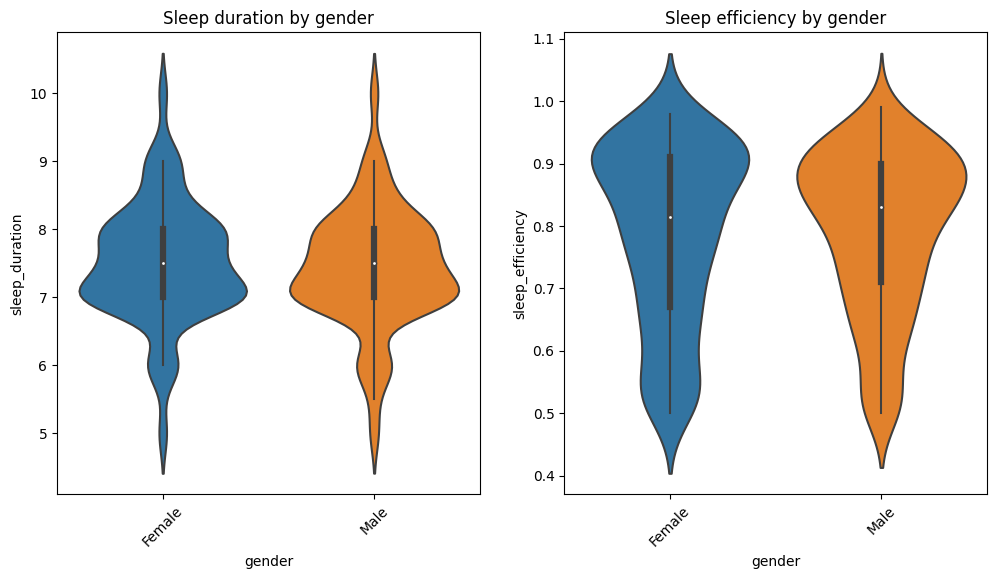

Duración media del sueño en hombres: 7.43
Duración media del sueño en mujeres: 7.5

Eficiencia media del sueño en hombres: 0.79
Eficiencia media del sueño en mujeres: 0.79


In [343]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.violinplot(data=df, x='gender', y='sleep_duration', ax=ax1)
ax1.set_title('Sleep duration by gender')
ax1.tick_params(axis='x', rotation=45)

sns.violinplot(data=df, x='gender', y='sleep_efficiency', ax=ax2)
ax2.set_title('Sleep efficiency by gender')
ax2.tick_params(axis='x', rotation=45)

plt.show()

male = df[df['gender'] == 'Male']
dur_male = male['sleep_duration'].mean()
ef_male = male['sleep_efficiency'].mean()

female = df[df['gender'] == 'Female']
dur_female = female['sleep_duration'].mean()
ef_female = female['sleep_efficiency'].mean()

print(f'Duración media del sueño en hombres: {dur_male.round(2)}')
print(f'Duración media del sueño en mujeres: {dur_female.round(2)}\n')

print(f'Eficiencia media del sueño en hombres: {ef_male.round(2)}')
print(f'Eficiencia media del sueño en mujeres: {ef_female.round(2)}')

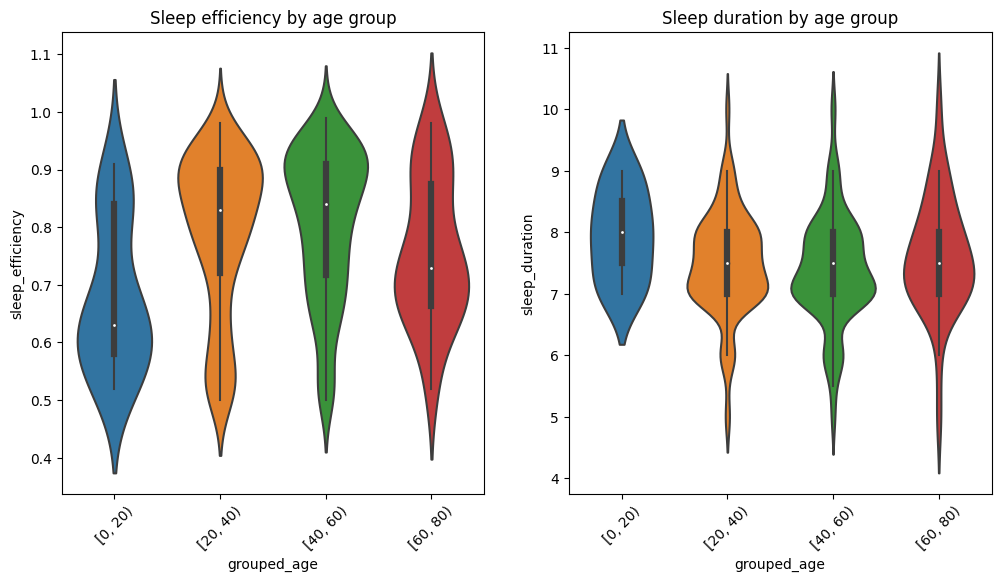

Duración media del sueño en el grupo de edad [0, 20): 7.94
Eficiencia media del sueño en el grupo de edad [0, 20): 0.68

Duración media del sueño en el grupo de edad [20, 40): 7.49
Eficiencia media del sueño en el grupo de edad [20, 40): 0.79

Duración media del sueño en el grupo de edad [40, 60): 7.38
Eficiencia media del sueño en el grupo de edad [40, 60): 0.8

Duración media del sueño en el grupo de edad [60, 80): 7.6
Eficiencia media del sueño en el grupo de edad [60, 80): 0.75



In [340]:
age_groups = pd.cut(df['age'], bins=range(0, 81, 20), right=False).sort_values().unique()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.violinplot(data=df, x='grouped_age', y='sleep_efficiency', ax=ax1)
ax1.set_title('Sleep efficiency by age group')
ax1.tick_params(axis='x', rotation=45)

sns.violinplot(data=df, x='grouped_age', y='sleep_duration', ax=ax2)
ax2.set_title('Sleep duration by age group')
ax2.tick_params(axis='x', rotation=45)

plt.show()

for age_group in age_groups:
    age_group_data = df[df['grouped_age'] == age_group]
    dur_age_group = age_group_data['sleep_duration'].mean()
    ef_age_group = age_group_data['sleep_efficiency'].mean()
    print(f'Duración media del sueño en el grupo de edad {age_group}: {dur_age_group.round(2)}')
    print(f'Eficiencia media del sueño en el grupo de edad {age_group}: {ef_age_group.round(2)}\n')


El lunes es el día que más se duerme, y el viernes el que menos. En cuanto a eficiencia destaca el sábado.

Por género no hay ninguna diferencia.

En cuanto a edad, los que más duermen son los menores de 20, que a su vez son los menos eficientes. Por el contrario tenemos a la franja entre los 40 y 60 años, que son los que menos duermen y los más eficaces.

In [341]:
#Calculate the median
med_dur = df['sleep_duration'].median()
hours_dur = int(med_dur)
min_dur = round((med_dur - hours_dur) * 60)

med_ef = df['sleep_efficiency'].median() * 100
med_ef = med_ef.round(2)

med_rem = df['rem_time'].median()
hours_rem = int(med_rem)
min_rem = round((med_rem - hours_rem) * 60)

med_deep = df['deep_time'].median()
hours_deep = int(med_deep)
min_deep = round((med_deep - hours_deep) * 60)

med_light = df['light_time'].median()
hours_light = int(med_light)
min_light = round((med_light - hours_light) * 60)

med_awakenings = df['awakenings'].median().round(2)

med_nosleep = df['nosleep_time'].median()
hours_nosleep = int(med_nosleep)
min_nosleep = round((med_nosleep - hours_nosleep) * 60)

#Print results
print(f'Vamos a analizar la mediana al ser mas representativa de los datos.')
print(f'Eficiencia del sueño {med_ef}%.\n')
print(f'Duración del sueño {hours_dur} horas y {min_dur} minutos, siendo {hours_rem} hora y {min_rem} minutos de sueño REM,\n\
{hours_deep} horas y {min_deep} minutos de sueño profundo y finalmente, {hours_light} hora y {min_light} minutos de sueño ligero.\n ')
print(f'Durante este tiempo lo normal es que se produzcan {med_awakenings} interrupciones del sueño, pasando\n\
{hours_nosleep} hora y {min_nosleep} minutos despierto.')


Vamos a analizar la mediana al ser mas representativa de los datos.
Eficiencia del sueño 82.0%.

Duración del sueño 7 horas y 30 minutos, siendo 1 hora y 41 minutos de sueño REM,
4 horas y 16 minutos de sueño profundo y finalmente, 1 hora y 22 minutos de sueño ligero.
 
Durante este tiempo lo normal es que se produzcan 1.0 interrupciones del sueño, pasando
1 hora y 17 minutos despierto.


In [342]:
# mean_dur = df['sleep_duration'].mean()
# hours_dur = int(mean_dur)
# min_dur = round((mean_dur - hours_dur) * 60)

# mean_ef = df['sleep_efficiency'].mean() * 100
# mean_ef = mean_ef.round(2)

# mean_rem = df['rem_time'].mean()
# hours_rem = int(mean_rem)
# min_rem = round((mean_rem - hours_rem) * 60)

# mean_deep = df['deep_time'].mean()
# hours_deep = int(mean_deep)
# min_deep = round((mean_deep - hours_deep) * 60)

# mean_light = df['light_time'].mean()
# hours_light = int(mean_light)
# min_light = round((mean_light - hours_light) * 60)

# mean_awakenings = df['awakenings'].mean().round(2)

# mean_nosleep = df['nosleep_time'].mean()
# hours_nosleep = int(mean_nosleep)
# min_nosleep = round((mean_nosleep - hours_nosleep) * 60)

# print(f'Eficiencia media del sueño {mean_ef}%.\n')
# print(f'Duración media del sueño {hours_dur} horas y {min_dur} minutos, siendo {hours_rem} hora y {min_rem} minutos de sueño REM,\n\
# {hours_deep} horas y {min_deep} minutos de sueño profundo y finalmente, {hours_light} hora y {min_light} minutos de sueño ligero.\n ')
# print(f'Durante este tiempo lo normal es que se produzcan {mean_awakenings} interrupciones del sueño, pasando una media de\n\
# {hours_nosleep} hora y {min_nosleep} minutos despierto.')
